## Online Retails Purchase
# Introduction:
Step 1. Import the necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

# set this so the graphs open internally
%matplotlib inline

Step 2. Import the dataset from this address.


Step 3. Assign it to a variable called online_rt

In [2]:
online_rt = 'https://raw.githubusercontent.com/thieu1995/csv-files/main/data/pandas/Online_Retail.csv'

Step 4. Create a histogram with the 10 countries that have the most 'Quantity' ordered except UK

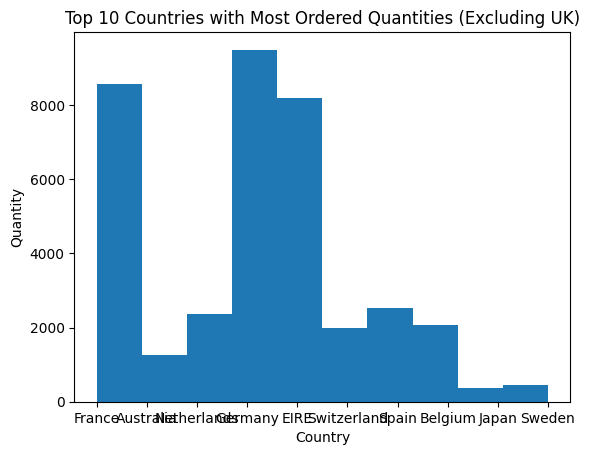

In [4]:
df = pd.read_csv(online_rt, encoding='latin1')

# Loại bỏ các bản ghi với 'Country' là UK
df = df[df['Country'] != 'United Kingdom']

# Tính tổng số lượng đặt hàng cho mỗi quốc gia
country_qty = df.groupby('Country')['Quantity'].sum()

# Lấy 10 quốc gia có số lượng đặt hàng nhiều nhất
top_10_countries = country_qty.nlargest(10).index

# Lấy dữ liệu của các quốc gia trên
df_top_countries = df[df['Country'].isin(top_10_countries)]

# Vẽ histogram
plt.hist(df_top_countries['Country'], bins=10)
plt.xlabel('Country')
plt.ylabel('Quantity')
plt.title('Top 10 Countries with Most Ordered Quantities (Excluding UK)')
plt.show()

Step 5. Exclude negative Quantity entries

In [14]:
df = pd.read_csv(online_rt, encoding='latin1')
# Loại bỏ các bản ghi với 'Quantity' âm
df = df[df['Quantity'] > 0]
print(len(df))

531285


Step 6. Create a scatterplot with the Quantity per UnitPrice by CustomerID for the top 3 Countries (except UK)

['Germany', 'France', 'EIRE']
       InvoiceNo StockCode                      Description  Quantity  \
26        536370     22728        ALARM CLOCK BAKELIKE PINK        24   
27        536370     22727        ALARM CLOCK BAKELIKE RED         24   
28        536370     22726       ALARM CLOCK BAKELIKE GREEN        12   
29        536370     21724  PANDA AND BUNNIES STICKER SHEET        12   
30        536370     21883                 STARS GIFT TAPE         24   
...          ...       ...                              ...       ...   
541904    581587     22613      PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899     CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254    CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255  CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138    BAKING SET 9 PIECE RETROSPOT          3   

          InvoiceDate  UnitPrice  CustomerID Country  
26       12/1/10 8:45       3.75     1

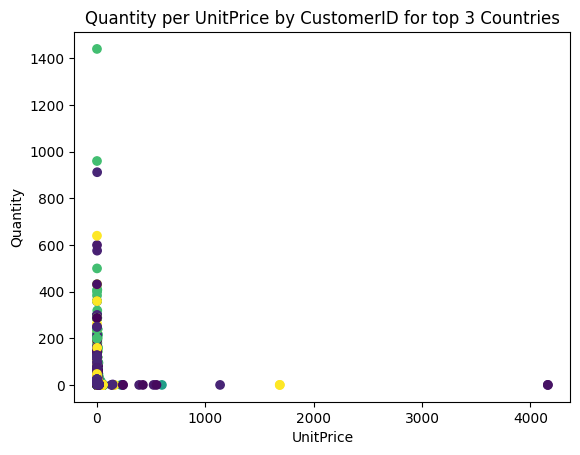

In [20]:
df = df[df['Quantity'] > 0]

# Loại bỏ khách hàng ở UK
df = df[df['Country'] != 'United Kingdom']

# Lấy danh sách các quốc gia có nhiều đơn hàng nhất
top_countries = df['Country'].value_counts().head(3).index.tolist()
print(top_countries)

# Lấy các bản ghi thuộc top 3 quốc gia
df_top_countries = df[df['Country'].isin(top_countries)]
print(df_top_countries)

# Tạo scatterplot
plt.scatter(df_top_countries['UnitPrice'], df_top_countries['Quantity'], c=df_top_countries['CustomerID'])
plt.xlabel('UnitPrice')
plt.ylabel('Quantity')
plt.title('Quantity per UnitPrice by CustomerID for top 3 Countries')
plt.show()


Step 7.1.1 Display the first few rows of that DataFrame.

In [22]:
df = pd.read_csv(online_rt, encoding='latin1')
df.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


Step 7.1.2 Think about what that piece of code does and display the dtype of UnitPrice

In [24]:
print(df['UnitPrice'].dtype) 

float64


Step 7.1.3 Pull data from online_rt for CustomerID s 12346.0 and 12347.0.

In [27]:
online_rt = pd.read_csv(online_rt, encoding='latin1')
customer_ids = [12346.0, 12347.0]
df_customer = online_rt.loc[online_rt['CustomerID'].isin(customer_ids)]

print(df_customer.head())

      InvoiceNo StockCode                          Description  Quantity  \
14938    537626     85116      BLACK CANDELABRA T-LIGHT HOLDER        12   
14939    537626     22375    AIRLINE BAG VINTAGE JET SET BROWN         4   
14940    537626     71477    COLOUR GLASS. STAR T-LIGHT HOLDER        12   
14941    537626     22492              MINI PAINT SET VINTAGE         36   
14942    537626     22771  CLEAR DRAWER KNOB ACRYLIC EDWARDIAN        12   

         InvoiceDate  UnitPrice  CustomerID  Country  
14938  12/7/10 14:57       2.10     12347.0  Iceland  
14939  12/7/10 14:57       4.25     12347.0  Iceland  
14940  12/7/10 14:57       3.25     12347.0  Iceland  
14941  12/7/10 14:57       0.65     12347.0  Iceland  
14942  12/7/10 14:57       1.25     12347.0  Iceland  


8. Plot a line chart showing revenue (y) per UnitPrice (x).

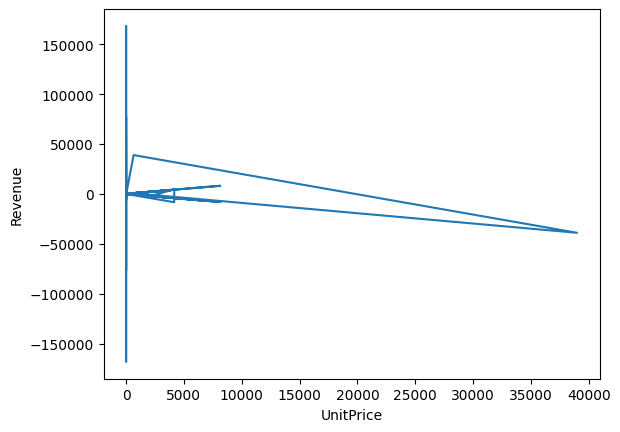

In [37]:
# Đọc dữ liệu từ file Online_Retail.csv
df = pd.read_csv('https://raw.githubusercontent.com/thieu1995/csv-files/main/data/pandas/Online_Retail.csv', encoding='latin1')

# Loại bỏ các mục bị thiếu thông tin
df.dropna(inplace=True)

# Tạo một cột mới là tổng doanh thu bằng cách nhân số lượng với giá của mỗi đơn hàng
df['Revenue'] = df['Quantity'] * df['UnitPrice']
# print(df['UnitPrice'])
# print(df['Quantity'])
# print(df['Revenue'])
# Tạo biểu đồ đường
plt.plot(df['UnitPrice'], df['Revenue'])

# Đặt tên cho trục hoành và trục tung
plt.xlabel('UnitPrice')
plt.ylabel('Revenue')

# Hiển thị biểu đồ
plt.show()

8.1 Group UnitPrice by intervals of 1 for prices [0,50), and sum Quantity and Revenue.

In [51]:
# Tạo các khoảng giá trị từ 0 đến 50
bins = pd.IntervalIndex.from_tuples([(0, 10), (10, 20), (20, 30), (30, 40), (40, 50)])
list =[(0, 10), (10, 20), (20, 30), (30, 40), (40, 50)]
# Nhóm dữ liệu theo khoảng giá trị và tính tổng Quantity và Revenue
df_price_intervals = df.groupby(pd.cut(df['UnitPrice'], bins)).agg({'Quantity': 'sum', 'Revenue': 'sum'})

# Hiển thị DataFrame kết quả
df_price_intervals['UnitPrice'] = pd.IntervalIndex(bins).mid

print(df_price_intervals)


           Quantity      Revenue  UnitPrice
UnitPrice                                  
(0, 10]     4856973  7794903.114        5.0
(10, 20]      33932   435410.550       15.0
(20, 30]        820    20988.810       25.0
(30, 40]        880    33062.290       35.0
(40, 50]        160     7920.380       45.0


Plot

<Axes: xlabel='UnitPrice'>

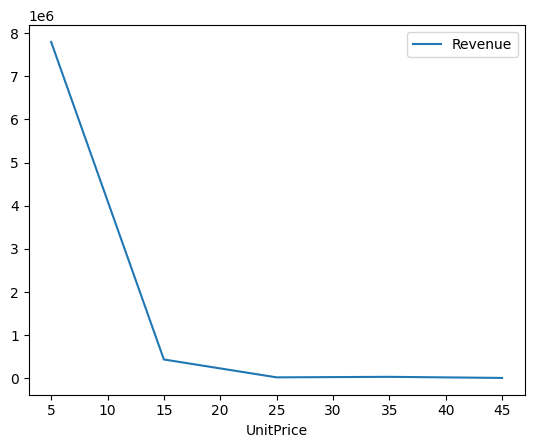

In [52]:
df_price_intervals.plot(kind='line', y='Revenue', x='UnitPrice')
#df_price_intervals.columns

Make it look nicer.

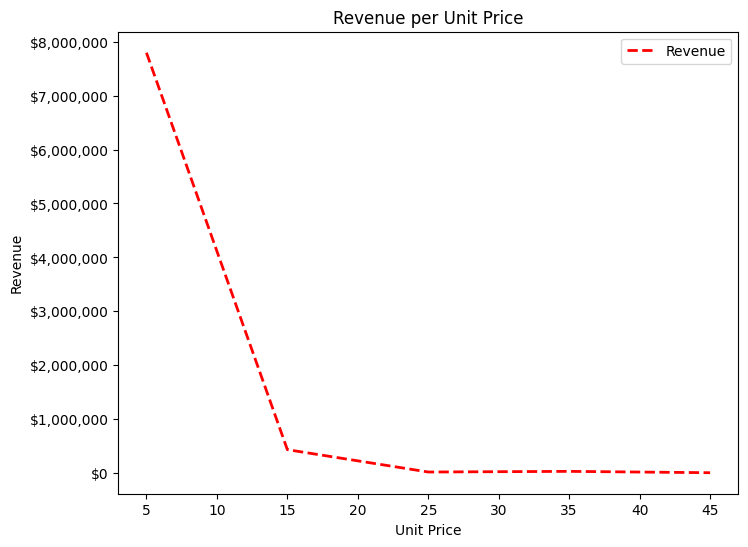

In [53]:
import matplotlib.pyplot as plt

# Vẽ biểu đồ đường
ax = df_price_intervals.plot(kind='line', y='Revenue', x='UnitPrice', figsize=(8, 6), color='red', linewidth=2, linestyle='--')

# Đặt tên cho trục x và trục y
ax.set_xlabel('Unit Price')
ax.set_ylabel('Revenue')

# Đặt tiêu đề cho biểu đồ
ax.set_title('Revenue per Unit Price')

# Định dạng trục x và trục y
ax.xaxis.set_major_locator(plt.MaxNLocator(10))
ax.yaxis.set_major_formatter('${x:,.0f}')

# Hiển thị biểu đồ
plt.show()


BONUS:vẽ biểu đồ thể hiện doanh thu (revenue) và số lượng đặt hàng (quantity)

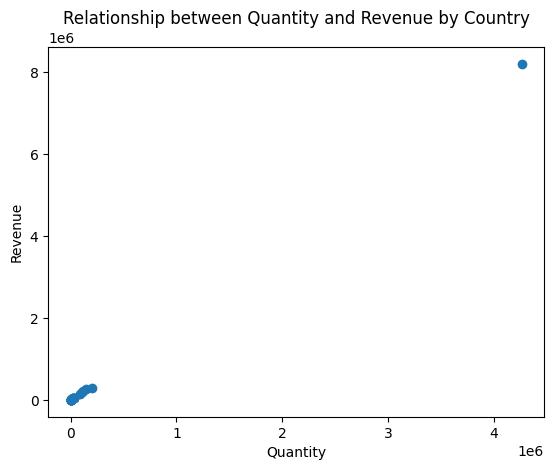

In [61]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data from online_rt
url = 'https://raw.githubusercontent.com/thieu1995/csv-files/main/data/pandas/Online_Retail.csv'
df = pd.read_csv(url, encoding='latin1')

# Group data by Country and sum up Quantity and Revenue
df['Revenue'] = df['Quantity'] * df['UnitPrice']
grouped_data = df.groupby('Country').agg({'Quantity': 'sum', 'Revenue': 'sum'})

# Create a scatterplot of Quantity vs Revenue for each Country
plt.scatter(grouped_data['Quantity'], grouped_data['Revenue'])

# Add labels and title
plt.xlabel('Quantity')
plt.ylabel('Revenue')
plt.title('Relationship between Quantity and Revenue by Country')

# Show the plot
plt.show()
